In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import re
import random

In [42]:
df = pd.read_csv('dataset.csv')
df['Price'] = df['Price'].str.replace('₹', '')

In [43]:
print(df.shape)

(34284, 23)


Function

In [44]:
# จัดการ SIde_effect
def split_side_effect(text):
    if not isinstance(text, str):
        return []  
    pattern = r'(?<=[a-z )])(?=[A-Z])'
    side_effects = re.split(pattern, text)
    side_effects = [effect.strip() for effect in side_effects if effect.strip()]
    return side_effects
df['Side_effects'] = df['Side_effects'].apply(split_side_effect)

In [45]:
# จัดการข้อมูล Status
def clean_status(status_text):
    if isinstance(status_text, str):
        pattern = r"(available|sold out)"
        match = re.search(pattern, status_text, re.I)
        if match:
            return match.group(0).lower()
        else:
            return "Not found"
    else:
        return "Not found"
df['Status'] = df['Status'].apply(clean_status)

Data Prep

In [46]:
df.drop('Poor', axis=1, inplace=True)
df.drop('Excellent', axis=1, inplace=True)
df.drop('Average', axis=1, inplace=True)

In [47]:
df.drop('web-scraper-order', axis=1, inplace=True)
df.drop('web-scraper-start-url', axis=1, inplace=True)
df.drop('Links', axis=1, inplace=True)
df.drop('Links-href', axis=1, inplace=True)

In [48]:
df["Alcohol"].fillna("No_impact", inplace=True)
df["Pregnancy"].fillna("No_impact", inplace=True)
df["Breast feeding"].fillna("No_impact", inplace=True)
df["Driving"].fillna("No_impact", inplace=True)
df["Kidney"].fillna("No_impact", inplace=True)
df["Liver"].fillna("No_impact", inplace=True)

df['Alcohol'] = df['Alcohol'].str.lower()
df['Pregnancy'] = df['Pregnancy'].str.lower()
df['Breast feeding'] = df['Breast feeding'].str.lower()
df['Driving'] = df['Driving'].str.lower()
df['Kidney'] = df['Kidney'].str.lower()
df['Liver'] = df['Liver'].str.lower()

In [49]:
df[['Alcohol','Pregnancy','Breast feeding','Driving','Kidney','Liver']].head()

,Alcohol,Pregnancy,Breast feeding,Driving,Kidney,Liver
0,caution,caution,no_impact,no_impact,no_impact,no_impact
1,caution,caution,no_impact,no_impact,no_impact,no_impact
2,caution,caution,no_impact,no_impact,no_impact,no_impact
3,caution,caution,no_impact,no_impact,no_impact,no_impact
4,consult your doctor,consult your doctor,unsafe,unsafe,safe if prescribed,caution


In [50]:
df[['Name','Uses','Composition','Side_effects','Status']].head()

,Name,Uses,Composition,Side_effects,Status
0,Aceloflam Plus Tablet,Pain relief,Aceclofenac (100mg) + Paracetamol (325mg),"[Nausea, Vomiting, Stomach pain/epigastric pai...",sold out
1,Aceloflam Plus Tablet,Pain relief,Aceclofenac (100mg) + Paracetamol (325mg),"[Nausea, Vomiting, Stomach pain/epigastric pai...",sold out
2,Aceloflam Plus Tablet,Pain relief,Aceclofenac (100mg) + Paracetamol (325mg),"[Nausea, Vomiting, Stomach pain/epigastric pai...",available
3,Aceloflam Plus Tablet,Pain relief,Aceclofenac (100mg) + Paracetamol (325mg),"[Nausea, Vomiting, Stomach pain/epigastric pai...",available
4,Adriamycin 50mg Injection,Cancer,Doxorubicin (Plain) (50mg),"[Vomiting, Allergic reaction, Nausea, Mouth so...",available


In [51]:
df.shape

(34284, 16)

In [52]:
missing_names = df[df['Name'].isnull()]
# นับจำนวนของ missing value ในคอลัมน์ 'Name'
count_missing_names = missing_names.shape[0]
count_missing_names

0

Data Visualization

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34284 entries, 0 to 34283
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            34284 non-null  object 
 1   Uses            34121 non-null  object 
 2   Price           24903 non-null  object 
 3   Composition     34284 non-null  object 
 4   Side_effects    34284 non-null  object 
 5   Alcohol         34284 non-null  object 
 6   Pregnancy       34284 non-null  object 
 7   Breast feeding  34284 non-null  object 
 8   Driving         34284 non-null  object 
 9   Kidney          34284 non-null  object 
 10  Liver           34284 non-null  object 
 11  How_to_use      34251 non-null  object 
 12  Status          34284 non-null  object 
 13  manufacturer    34284 non-null  object 
 14  Unit Quantity   20984 non-null  float64
 15  Unit Type       32254 non-null  object 
dtypes: float64(1), object(15)
memory usage: 4.2+ MB


In [54]:
count_nan = df['Price'].isnull().sum()
print(f"จำนวนค่า NaN ในคอลัมน์ Price คือ: {count_nan}")

จำนวนค่า NaN ในคอลัมน์ Price คือ: 9381


In [55]:
df['Price'].fillna(method='ffill', inplace=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # แปลงเป็นตัวเลข (หากเป็นข้อความ)
df['Price'] = df['Price'].round(0).astype(int)  # แปลงเป็นจำนวนเต็ม

In [56]:
count_nan = df['Price'].isnull().sum()
print(f"จำนวนค่า NaN ในคอลัมน์ Price คือ: {count_nan}")

จำนวนค่า NaN ในคอลัมน์ Price คือ: 0


In [57]:
max_price = df['Price'].max()
print("ค่าสูงสุดของ Price คือ:", max_price)

ค่าสูงสุดของ Price คือ: 367361


In [58]:
df['Alcohol'].replace(['caution', 'consult your doctor'], 'unsafe', inplace=True)
df['Alcohol'].replace(['no_impact', 'safe','safe if prescribed'], 'safe', inplace=True)

df['Pregnancy'].replace(['caution', 'consult your doctor'], 'unsafe', inplace=True)
df['Pregnancy'].replace(['no_impact','safe if prescribed'], 'safe', inplace=True)

df['Breast feeding'].replace(['caution', 'consult your doctor'], 'unsafe', inplace=True)
df['Breast feeding'].replace(['no_impact','safe if prescribed'], 'safe', inplace=True)

df['Driving'].replace(['caution', 'consult your doctor'], 'unsafe', inplace=True)
df['Driving'].replace(['no_impact','safe if prescribed','not relevant'], 'safe', inplace=True)

df['Kidney'].replace(['caution', 'consult your doctor'], 'unsafe', inplace=True)
df['Kidney'].replace(['no_impact','safe if prescribed'], 'safe', inplace=True)

df['Liver'].replace(['caution', 'consult your doctor'], 'unsafe', inplace=True)
df['Liver'].replace(['no_impact','safe if prescribed'], 'safe', inplace=True)

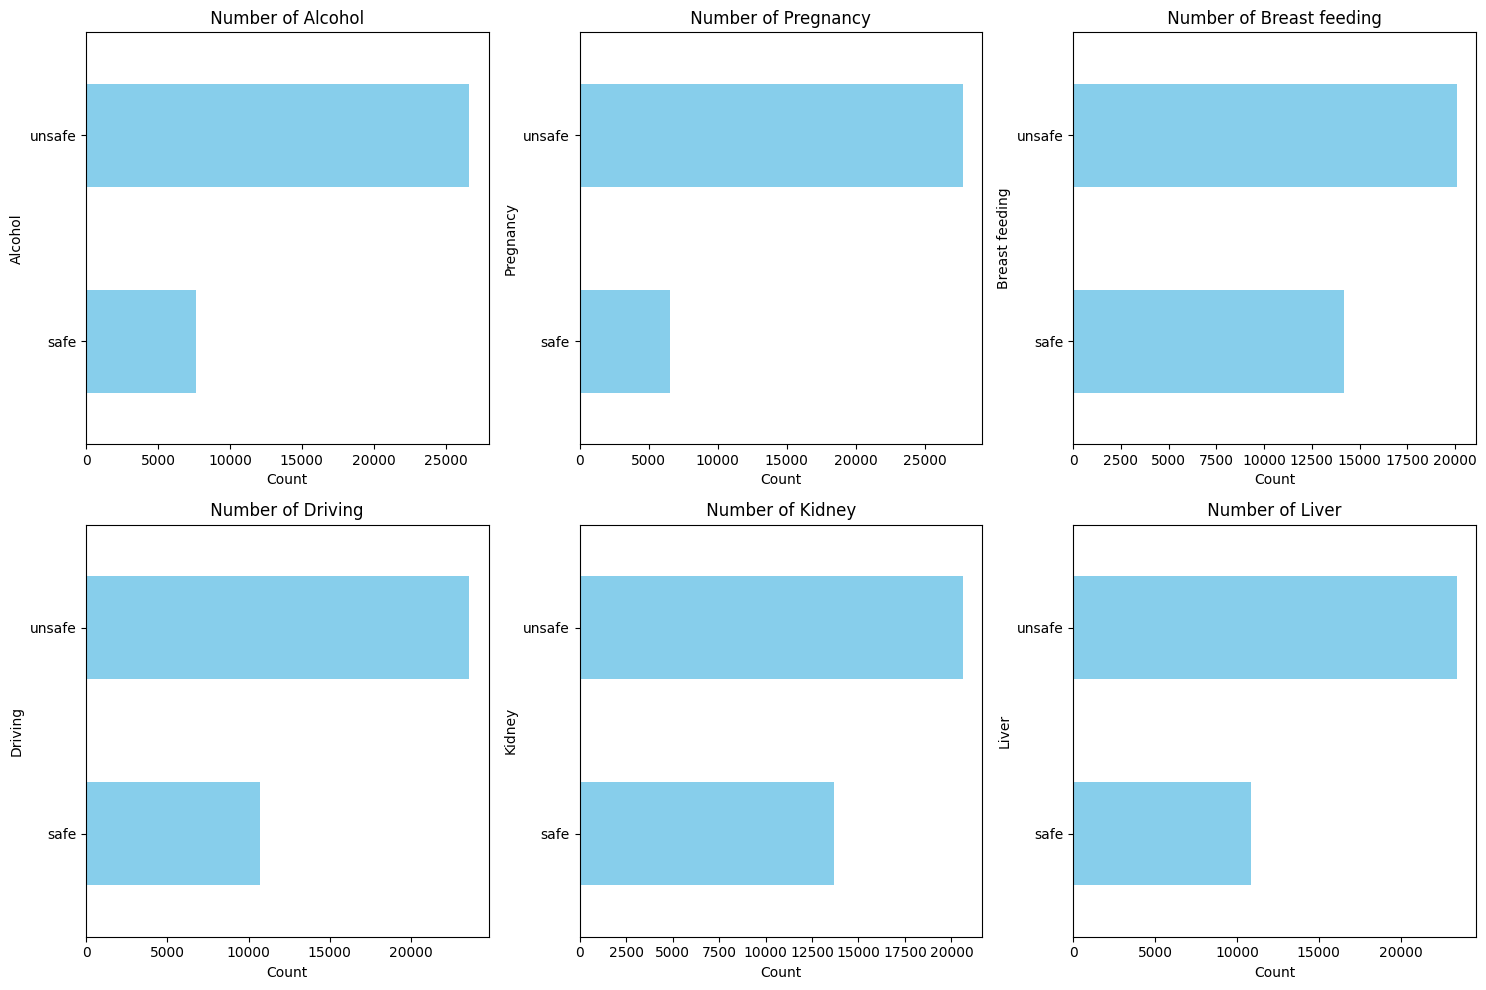

In [59]:
columns_to_plot = ['Alcohol', 'Pregnancy', 'Breast feeding', 'Driving', 'Kidney', 'Liver']

num_cols = 3
num_rows = -(-len(columns_to_plot) // num_cols)  
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    col_counts = df[col].value_counts()
    
    col_counts.sort_values().plot(kind='barh', color='skyblue', ax=axes[i])
    axes[i].set_title(f' Number of {col} ')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

for j in range(len(columns_to_plot), num_cols * num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Feature Engineer

In [60]:
df = df.rename(columns={'manufacturer': 'Manufacturer'})

In [61]:
df['Unit'] = df['Name'].copy()

In [62]:
new_order = ['Name','Unit Quantity','Unit Type', 'Manufacturer', 'Price', 'Composition','Uses', 'Side_effects','Alcohol','Pregnancy','Breast feeding','Driving','Kidney','Liver','Status']
df = df.reindex(columns=new_order)

In [63]:
df

,Name,Unit Quantity,Unit Type,Manufacturer,Price,Composition,Uses,Side_effects,Alcohol,Pregnancy,Breast feeding,Driving,Kidney,Liver,Status
0,Aceloflam Plus Tablet,NaN,Tablet,Alkem Laboratories Ltd,86,Aceclofenac (100mg) + Paracetamol (325mg),Pain relief,"[Nausea, Vomiting, Stomach pain/epigastric pai...",unsafe,unsafe,safe,safe,safe,safe,sold out
1,Aceloflam Plus Tablet,NaN,Tablet,Alkem Laboratories Ltd,86,Aceclofenac (100mg) + Paracetamol (325mg),Pain relief,"[Nausea, Vomiting, Stomach pain/epigastric pai...",unsafe,unsafe,safe,safe,safe,safe,sold out
2,Aceloflam Plus Tablet,NaN,Tablet,Alkem Laboratories Ltd,160,Aceclofenac (100mg) + Paracetamol (325mg),Pain relief,"[Nausea, Vomiting, Stomach pain/epigastric pai...",unsafe,unsafe,safe,safe,safe,safe,available
3,Aceloflam Plus Tablet,NaN,Tablet,Alkem Laboratories Ltd,160,Aceclofenac (100mg) + Paracetamol (325mg),Pain relief,"[Nausea, Vomiting, Stomach pain/epigastric pai...",unsafe,unsafe,safe,safe,safe,safe,available
4,Adriamycin 50mg Injection,50.0,Injection,Pfizer Ltd,282,Doxorubicin (Plain) (50mg),Cancer,"[Vomiting, Allergic reaction, Nausea, Mouth so...",unsafe,unsafe,unsafe,unsafe,safe,unsafe,available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34279,Yees-D Capsule SR,NaN,Tablet,Alkem Laboratories Ltd,149,Domperidone (30mg) + Esomeprazole (40mg),Treatment of Gastroesophageal reflux disease (...,"[Diarrhea, Flatulence, Stomach pain, Dryness i...",unsafe,unsafe,safe,unsafe,unsafe,unsafe,available
34280,Yamini Tablet,NaN,Tablet,Lupin Ltd,149,Ethinyl Estradiol (0.03mg) + Drospirenone (3mg),Hormone replacement therapy Post menopausal os...,"[Headache, Nausea, Breast tenderness, Uterine ...",unsafe,unsafe,unsafe,safe,unsafe,unsafe,available
34281,Yasmin Tablet,500.0,Tablet,Bayer Zydus Pharma Pvt Ltd,149,Ethinyl Estradiol (0.03mg) + Drospirenone (3mg),Hormone replacement therapy Post menopausal os...,"[Headache, Nausea, Breast tenderness, Uterine ...",unsafe,unsafe,unsafe,safe,unsafe,unsafe,available
34282,Zita-Piomet 500 Tablet SR,NaN,Capsule,Glenmark Pharmaceuticals Ltd,137,Metformin (500mg) + Pioglitazone (15mg) + Tene...,Treatment of Type 2 diabetes mellitus,"[Hypoglycemia (low blood glucose level), Const...",unsafe,unsafe,unsafe,unsafe,unsafe,safe,sold out


In [64]:
missing_values = df.isnull().sum()
missing_values

Name                  0
Unit Quantity     13300
Unit Type          2030
Manufacturer          0
Price                 0
Composition           0
Uses                163
Side_effects          0
Alcohol               0
Pregnancy             0
Breast feeding        0
Driving               0
Kidney                0
Liver                 0
Status                0
dtype: int64

Feature Vectorization

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=20000, stop_words='english')

In [66]:
selected_columns = df[['Uses','Composition', 'Side_effects','Alcohol','Pregnancy','Breast feeding','Driving','Kidney','Liver','Unit Type']]
text_data = selected_columns.apply(lambda row: ' '.join(row.astype(str)), axis=1)

In [67]:
vector = tfidf.fit_transform(text_data).toarray()
vector.shape

(34284, 3519)

In [68]:
df.dtypes

Name               object
Unit Quantity     float64
Unit Type          object
Manufacturer       object
Price               int32
Composition        object
Uses               object
Side_effects       object
Alcohol            object
Pregnancy          object
Breast feeding     object
Driving            object
Kidney             object
Liver              object
Status             object
dtype: object

In [69]:
df['Unit Quantity'].fillna(0, inplace=True)
df['Unit Quantity'] = df['Unit Quantity'].astype('int64')
df['Price'] = df['Price'].astype('int64')

cosine_similarity

In [70]:
similarity = cosine_similarity(vector)
similarity.shape

(34284, 34284)

Recommendation system

In [71]:
import jellyfish

In [72]:
def recommedation_system_cosin(medicine, side_effects, liversafety, price_limit, df, similarity):
    user_input = f'{medicine} {" ".join(side_effects)} {" ".join(liversafety)}' if side_effects or liversafety else medicine

    jelly_matches = [(name, jellyfish.jaro_winkler_similarity(user_input, name)) for name in df['Name'].values]
    closest_match = max(jelly_matches, key=lambda x: x[1])[0]

    if closest_match in df['Name'].values:
        med_index = df[df['Name'] == closest_match].index[0]
        distances = similarity[med_index]
        med_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:11]
        recommended_medicine = []

        for i in med_list:
            med_index = i[0]
            similarity_score = round(i[1], 2)
            med_name = df.iloc[med_index]['Name']
            med_kidneysafety = df.iloc[med_index]['Kidney']  
            med_liversafety = df.iloc[med_index]['Liver']  

            side_effect_matches = [side_effect for side_effect in side_effects if side_effect in med_kidneysafety]
            liversafety_matches = [liver for liver in liversafety if liver in med_liversafety]

            side_effects_match = side_effect_matches == side_effects
            liversafety_match = liversafety_matches == liversafety

            if (liversafety and not side_effects) or (side_effects and not liversafety):
                if liversafety and liversafety_match:
                    recommended_medicine.append((med_name, similarity_score))
            elif side_effects and side_effects_match:
                recommended_medicine.append((med_name, similarity_score))

        # ตรวจสอบและเลือกยาที่ไม่เกินงบประมาณที่กำหนด (ในกรณีที่ price_limit ไม่ใช่ None)
        if price_limit is not None:
            recommended_within_budget = [
                (med, score, df[df['Name'] == med]['Price'].values[0])
                for med, score in recommended_medicine
                if df[df['Name'] == med]['Price'].values[0] is not None and df[df['Name'] == med]['Price'].values[0] <= price_limit
            ]
        else:
            recommended_within_budget = [
                (med, score, df[df['Name'] == med]['Price'].values[0])
                for med, score in recommended_medicine
            ]  # ถ้า price_limit เป็น None ให้เลือกยาทั้งหมด

        # เลือกยาที่ดีที่สุดโดยดูความคล้ายคลึงและไม่เกินงบประมาณ
        filtered_medicine = []
        already_added = set()
        for med, score, price in recommended_within_budget:
            if med not in already_added:
                filtered_medicine.append((med, score, price))
                already_added.add(med)

        return filtered_medicine[:5]  # คืนค่ายาที่ดีที่สุดไม่เกิน 10 ตัว


def print_recommendations(user_input, recommendations):
    
    print(f"Input: {user_input[0]}")
    if recommendations:
        for med, score, price in recommendations:
            print(f"{med} - Similarity Score: {score} - Price: {price} ฿")
    else:
        print("No recommendations within the budget.")
    print("\n")

user_input = [
    ('S-Methiwave 200 Tablet', [''], [''], None),
    ('Anfoe 6000IU Injection', [''], [''], None),
    ('Atchthii', [''], [''], None)
]

recommendations = [recommedation_system_cosin(*ui, df, similarity) for ui in user_input]

for idx, rec in enumerate(recommendations, start=1):
    print(f"ยาตัวที่ {idx}")
    print_recommendations(user_input[idx - 1], rec)

ยาตัวที่ 1
Input: S-Methiwave 200 Tablet
New Nusam 200 Tablet - Similarity Score: 1.0 - Price: 190 ฿
S-Methiwave 200 Tablet - Similarity Score: 1.0 - Price: 110 ฿
New Adesam 200 Tablet - Similarity Score: 0.96 - Price: 146 ฿
Adefresh 400 Tablet - Similarity Score: 0.91 - Price: 662 ฿
Cirrosam 400 Tablet - Similarity Score: 0.91 - Price: 505 ฿


ยาตัวที่ 2
Input: Anfoe 6000IU Injection
Epofit 6000IU Injection - Similarity Score: 1.0 - Price: 134 ฿
Wepox Pen Reusable Injection - Similarity Score: 0.95 - Price: 398 ฿
Epofit 5000IU Injection - Similarity Score: 0.94 - Price: 219 ฿
Wepox 5000IU Injection - Similarity Score: 0.94 - Price: 80 ฿
Anfoe 10000IU Injection - Similarity Score: 0.94 - Price: 2072 ฿


ยาตัวที่ 3
Input: Atchthii
AZR Tablet - Similarity Score: 1.0 - Price: 422 ฿
Azathioprine 50mg Tablet - Similarity Score: 1.0 - Price: 96 ฿
Azoran Tablet - Similarity Score: 1.0 - Price: 225 ฿
Imuza Tablet - Similarity Score: 1.0 - Price: 100 ฿
Immugo Tablet - Similarity Score: 1.0 - Pr

In [73]:
recommendations

[[('New Nusam 200 Tablet', 1.0, 190),
  ('S-Methiwave 200 Tablet', 1.0, 110),
  ('New Adesam 200 Tablet', 0.96, 146),
  ('Adefresh 400 Tablet', 0.91, 662),
  ('Cirrosam 400 Tablet', 0.91, 505)],
 [('Epofit 6000IU Injection', 1.0, 134),
  ('Wepox Pen Reusable Injection', 0.95, 398),
  ('Epofit 5000IU Injection', 0.94, 219),
  ('Wepox 5000IU Injection', 0.94, 80),
  ('Anfoe 10000IU Injection', 0.94, 2072)],
 [('AZR Tablet', 1.0, 422),
  ('Azathioprine 50mg Tablet', 1.0, 96),
  ('Azoran Tablet', 1.0, 225),
  ('Imuza Tablet', 1.0, 100),
  ('Immugo Tablet', 1.0, 166)]]

Optimization

In [74]:
def flatten_list(nested_list):
    flattened_list = []
    for element in nested_list:
        if isinstance(element, list):
            flattened_list.extend(flatten_list(element))
        else:
            flattened_list.append(element)
    return flattened_list
recommendations = flatten_list(recommendations)

def initialize_population(population_size, recommendations1, budget):
    population = []
    group_1 = recommendations1[:5]
    group_2 = recommendations1[5:10]
    group_3 = recommendations1[10:15]

    while len(population) < population_size:
        selected_medicines = []
        total_price = 0

        # สุ่มตามกลุ่มที่กำหนด
        selected_group_1 = random.sample(group_1, 1)
        selected_group_2 = random.sample(group_2, 1)
        selected_group_3 = random.sample(group_3, 1)

        selected_medicines.extend(selected_group_1 + selected_group_2 + selected_group_3)
        total_price = sum([med[2] for med in selected_medicines])

        # เพิ่ม solution เข้าไปใน population
        if selected_medicines not in [item[0] for item in population]:
            population.append(selected_medicines)

    return population

def evaluate_fitness(solution, budget):
    similarity_score = sum([med[1] for med in solution])
    total_price = sum([med[2] for med in solution])
    if total_price <= budget:
        fitness = round((similarity_score ** 3 / total_price) * 100, 4)
    else:
        fitness = 0
    return fitness

def optimize_bee_algorithm(recommendations, budget, population_size, iterations, patches_count, e_sites):
    best_solution = None
    best_fitness = float('-inf')
    population = initialize_population(population_size, recommendations, budget)
    
    for i in range(iterations):
        patch_size = population_size // patches_count
        patch_solutions = [population[j * patch_size:(j + 1) * patch_size] for j in range(patches_count)]
        
        for patch in patch_solutions:
            e_sites_count = min(len(patch), e_sites)
            selected_bees = random.sample(patch, e_sites_count)
            
            for bee_solution in selected_bees:
                bee_fitness = evaluate_fitness(bee_solution, budget)
                if bee_fitness > best_fitness:
                    best_fitness = bee_fitness
                    best_solution = bee_solution
        
            for solution in patch:
                if solution not in selected_bees:
                    random_bee_fitness = evaluate_fitness(solution, budget)
                    if random_bee_fitness > best_fitness:
                        best_fitness = random_bee_fitness
                        best_solution = solution
        
        ## พิมพ์ fitness ในแต่ละขั้น
        #for idx, solution in enumerate(population, start=1):
         #   solution_fitness = evaluate_fitness(solution, budget)
          #  print(f"Iteration {i + 1}, Solution {idx} Fitness: {solution_fitness}")
 
    return best_solution, best_fitness

budget = 3000
population_size = 455
patches_count = 10
e_sites = 1
iterations = 10

optimized_solution, optimized_fitness = optimize_bee_algorithm(recommendations, budget, population_size, iterations, patches_count, e_sites)
print("Optimized Solution:", optimized_solution)
print("Optimized Fitness:", optimized_fitness)

Optimized Solution: [('S-Methiwave 200 Tablet', 1.0, 110), ('Wepox 5000IU Injection', 0.94, 80), ('Azathioprine 50mg Tablet', 1.0, 96)]
Optimized Fitness: 8.8854
